In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# TensorFlow and Keras for Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sklearn for Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Visualization Libraries
import seaborn as sns

# For Google Colab Specific Usage
from google.colab import drive
from google.colab.patches import cv2_imshow

# OpenCV for Image Processing (if needed)
import cv2

# Suppress TensorFlow Warnings (Optional)
import warnings
warnings.filterwarnings('ignore')


In [4]:

import os
import glob
import cv2
import numpy as np
from sklearn import preprocessing

# Initialize lists to store images and labels
images = []
labels = []

# Define the path to the resized dataset
dataset_path = "/content/drive/MyDrive/datasetresize"

# Iterate through the 'train' and 'test' folders
for data_type in ['train', 'test']:
    data_type_path = os.path.join(dataset_path, data_type)

    # Iterate through each emotion folder within 'train' and 'test' directories
    for emotion_folder in os.listdir(data_type_path):
        emotion_path = os.path.join(data_type_path, emotion_folder)

        if os.path.isdir(emotion_path):  # Ensure it's a directory
            # Loop through each image in the emotion folder
            for img_path in glob.glob(os.path.join(emotion_path, "*.png")):  # Adjust to match image files only
                try:
                    # Read image in grayscale mode
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                    # Append the image and its corresponding label
                    images.append(img)
                    labels.append(emotion_folder)
                except Exception as e:
                    print(f"Error reading image {img_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Total number of images loaded: {len(images)}")

# Convert labels to integers using LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

# Output the encoded labels to verify
print(f"Encoded Labels: {labels_encoded[:10]}")  # Display first 10 encoded labels as a check

# Segregating data for training and testing
x_data, y_data = images, labels_encoded

# Display shapes of data
print(f"x_data shape: {x_data.shape}, y_data shape: {y_data.shape}")


Total number of images loaded: 35182
Encoded Labels: [0 0 0 0 0 0 0 0 0 0]
x_data shape: (35182, 224, 224), y_data shape: (35182,)


In [5]:
from sklearn.model_selection import train_test_split

# Normalize the images by scaling pixel values to range [0, 1]
x_data = x_data.astype('float32') / 255.0

# Split data into training and validation sets (e.g., 80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Display shapes of the split datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


x_train shape: (28145, 224, 224), y_train shape: (28145,)
x_val shape: (7037, 224, 224), y_val shape: (7037,)


In [6]:
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

In [7]:
trainX / 255.0
testX / 255.0

array([[[3.1218762e-03, 3.1218762e-03, 3.1218762e-03, ...,
         7.9969241e-04, 7.9969241e-04, 7.9969241e-04],
        [3.1218762e-03, 3.1218762e-03, 3.1218762e-03, ...,
         7.9969241e-04, 7.9969241e-04, 7.9969241e-04],
        [3.1218762e-03, 3.1218762e-03, 3.1218762e-03, ...,
         7.9969241e-04, 7.9969241e-04, 7.9969241e-04],
        ...,
        [3.3217994e-03, 3.3217994e-03, 3.3217994e-03, ...,
         1.9377163e-03, 1.9377163e-03, 1.9377163e-03],
        [3.3525568e-03, 3.3525568e-03, 3.3525568e-03, ...,
         1.9377163e-03, 1.9377163e-03, 1.9377163e-03],
        [3.3525568e-03, 3.3525568e-03, 3.3525568e-03, ...,
         1.9377163e-03, 1.9377163e-03, 1.9377163e-03]],

       [[2.5990005e-03, 2.5990005e-03, 2.5836218e-03, ...,
         2.3068052e-03, 2.3221839e-03, 2.3221839e-03],
        [2.5990005e-03, 2.5990005e-03, 2.5836218e-03, ...,
         2.3068052e-03, 2.3221839e-03, 2.3221839e-03],
        [2.5990005e-03, 2.5990005e-03, 2.5836218e-03, ...,
         2.291

In [8]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dropout, Dense
)
import numpy as np

# Initialize the model
AlexNet = models.Sequential()

# Input layer adjusted for grayscale images of size 224x224
AlexNet.add(Conv2D(filters=96, input_shape=(224, 224, 1), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Flattening the data
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Dropout to avoid overfitting
AlexNet.add(Dropout(0.4))

# 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Dropout has been added
AlexNet.add(Dropout(0.4))

# 3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Dropout has been added
AlexNet.add(Dropout(0.4))

# Output Layer adjusted for 7 emotion classes
AlexNet.add(Dense(7))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Summary of the model
AlexNet.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 56, 56, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 56, 56, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 56, 56, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14, 14, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │              

 Total params: 76,035,907 (290.05 MB)

 Trainable params: 76,014,757 (289.97 MB)

 Non-trainable params: 21,150 (82.62 KB)

In [9]:
# Compile the model
AlexNet.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Set from_logits=False
    metrics=['accuracy']
)



In [10]:
# Define training parameters
epochs = 50
batch_size = 64

# Train the model with additional parameters
history = AlexNet.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),  # Use validation data to monitor performance
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]  # Early stopping to prevent overfitting
)


Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 79s 140ms/step - accuracy: 0.3258 - loss: 1.7986 - val_accuracy: 0.3264 - val_loss: 1.7386
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - accuracy: 0.5028 - loss: 1.3401 - val_accuracy: 0.4725 - val_loss: 1.3767
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.5728 - loss: 1.1606 - val_accuracy: 0.4381 - val_loss: 1.4337
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.6110 - loss: 1.0664 - val_accuracy: 0.5411 - val_loss: 1.2309
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.6563 - loss: 0.9636 - val_accuracy: 0.5659 - val_loss: 1.1773
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.7031 - loss: 0.8399 - val_accuracy: 0.5015 - val_loss: 1.3662
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.7464 - loss: 0.7356 - val_accuracy: 0.5616 - val_loss: 1.2429
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.8052 - loss: 0

In [46]:
# Save the model in HDF5 format
model_save = '/content/drive/MyDrive/alexnet_fer_model.keras'
AlexNet.save(model_save)

print(f"Model saved at {model_save}")


Model saved at /content/drive/MyDrive/alexnet_fer_model.keras


In [47]:
import tensorflow as tf

# Load the trained Keras model
model_path = '/content/drive/MyDrive/alexnet_fer_model.keras'
model = tf.keras.models.load_model(model_path)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = '/content/drive/MyDrive/alexnet_fer_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved at: {tflite_model_path}")


Saved artifact at '/tmp/tmpj1rd3ftr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  137980794407216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980796526736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980795787872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980795789280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980795782240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980795785584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980795789984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980796263184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980796260720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980796258608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137980796261952

220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6490 - loss: 0.9547
Test Loss: 0.9474, Test Accuracy: 0.6557
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.58      0.61      0.60       993
     disgust       0.71      0.47      0.56       109
        fear       0.80      0.23      0.35      1024
       happy       0.80      0.88      0.84      1798
     neutral       0.60      0.68      0.63      1240
         sad       0.51      0.65      0.58      1218
    surprise       0.72      0.76      0.74       655

    accuracy                           0.66      7037
   macro avg       0.67      0.61      0.61      7037
weighted avg       0.68      0.66      0.64      7037



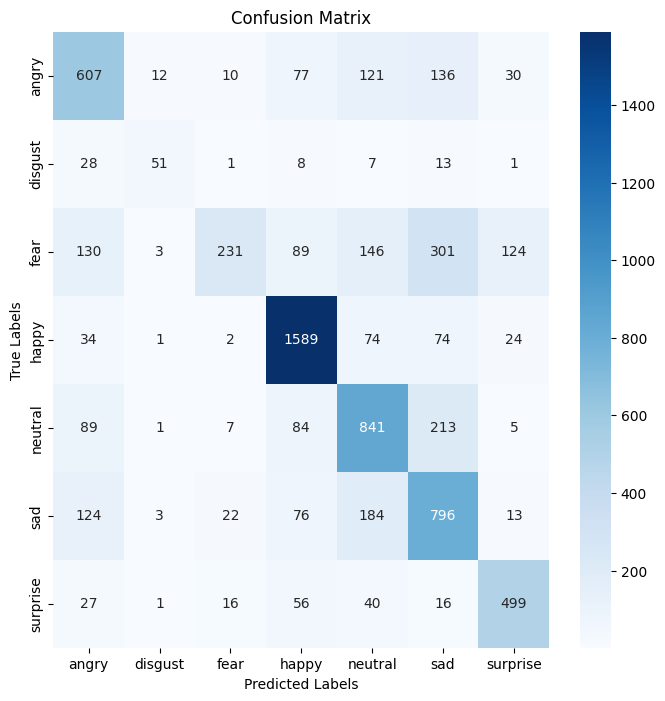

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = AlexNet.evaluate(testX, testY)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = np.argmax(AlexNet.predict(testX), axis=1)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(testY, y_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(testY, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


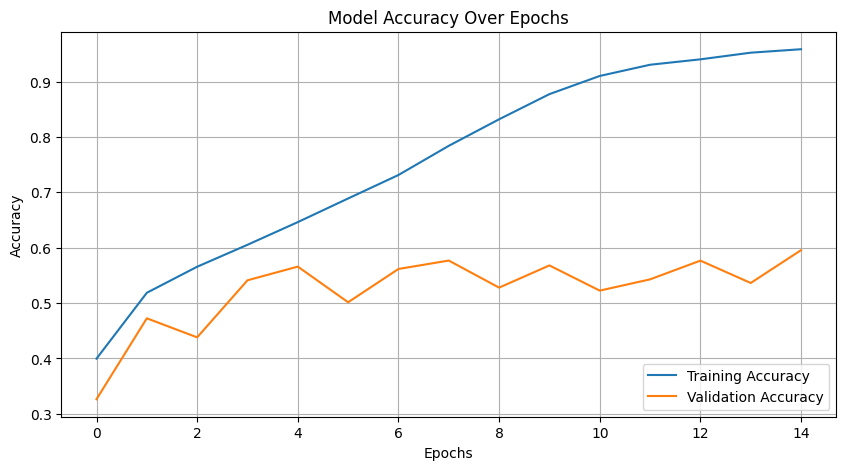

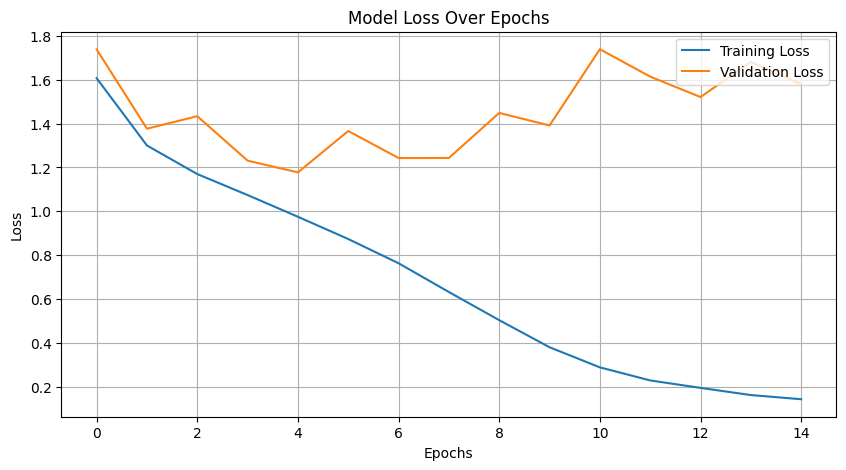

In [16]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_accuracy))  # Number of epochs

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


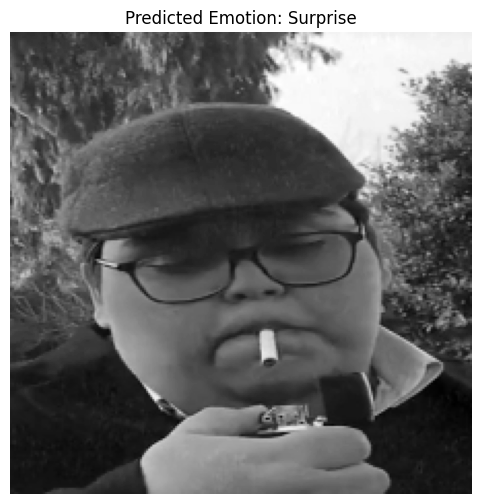

Recommended Songs:
                 name                   artist       mood
53    Beautiful Night          Burden Brothers  Energetic
537  Tears Don't Fall  Bullet For My Valentine  Energetic
213  Go With The Flow  Queens of the Stone Age  Energetic
78        Break Stuff              Limp Bizkit  Energetic
383      Nowhere Kids         Smile Empty Soul  Energetic


In [45]:
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved AlexNet model
model_path = '/content/drive/MyDrive/alexnet_fer_model.keras'
AlexNet_loaded = load_model(model_path)

# Load the Spotify dataset
spotify_data_path = '/content/drive/MyDrive/data_moods.csv'
spotify_data = pd.read_csv(spotify_data_path)

# Load the LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.classes_ = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])  # Update if classes differ

# Emotion to Music Mood Mapping
emotion_to_mood = {
    "Happy": "Happy",
    "Sad": "Sad",
    "Angry": "Energetic",
    "Neutral": "Ambient",
    "Surprise": "Energetic",
    "Fear": "Dark",
    "Disgust": "Moody"
}

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img_normalized = img.astype('float32') / 255.0  # Normalize pixel values
    img_expanded = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension for grayscale
    img_expanded = np.expand_dims(img_expanded, axis=0)  # Add batch dimension
    return img, img_expanded

# Function to recommend songs
def recommend_songs(predicted_emotion):
    mood = emotion_to_mood.get(predicted_emotion, "Neutral")
    recommendations = spotify_data[spotify_data['mood'] == mood].sample(5)  # Randomly select 5 songs
    return recommendations[['name', 'artist', 'mood']]

# Test a new image
image_path = '/content/drive/MyDrive/sampl images/kevan.png'  # Replace with the path to your test image
original_img, preprocessed_img = preprocess_image(image_path)

# Predict the emotion
predicted_label_index = np.argmax(AlexNet_loaded.predict(preprocessed_img))
predicted_emotion = le.inverse_transform([predicted_label_index])[0]

# Recommend songs based on the predicted emotion
recommended_songs = recommend_songs(predicted_emotion)

# Display the image with the predicted emotion
plt.figure(figsize=(6, 6))
plt.imshow(original_img, cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()

# Display recommended songs
print("Recommended Songs:")
print(recommended_songs)
